In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 设置参数
sc.settings.verbosity = 4
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=300,
    facecolor="white",
    frameon=False,  # remove frame
)

 7.去批次
- 7.1 读取标准化后的数据
- 7.2 取高变基因子集
- 7.3 scvi去批次
- 7.4 Harmony去批次
- 7.5 通过回归处理其他阻塞因素（可选）
- 7.6 保存
-------------------------------
- 整合批次只是为了最终注释

In [25]:
## 7.1 读取标准化后的数据
adata = sc.read("anndata_normalization.h5ad")
print(adata.layers["scran_normalization"].mean(),
adata.layers["counts"].mean(),
adata.layers["soupX_counts"].mean(),
adata.X.mean(),sep = "\n")

0.14049097792615584
0.8584280755254984
0.8584280755254984
0.8584280755254984


In [26]:
## 7.2 取高变基因
adata_batch = adata.copy()
sc.pp.highly_variable_genes(
    adata_batch,
    flavor="cell_ranger", # seurat_v3:期望原始counts
    n_top_genes=6000, # 500 - 5000，根据7.2.1看6000时均匀些
    layer="counts", # 这里可以试试soupX_counts
    batch_key="sample",
    subset=False # 取子集后anndata中只有1000个基因,普通去批次只用hvg
)
"""会发现新增了额外的列
    - highly_variable_nbatches- 发现每个基因高度可变的批次数量
    - highly_variable_intersection- 每个基因在每批中是否存在很大差异
    - highly_variable- 合并每批结果后是否将每个基因选择为高度可变
"""
adata_batch.var
# # 识别高变基因的方法
# sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# sc.pp.highly_variable_genes(adata, n_top_genes=1000) 

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


    the 6000 top genes correspond to a normalized dispersion cutoff of 0.4714104055107304


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defa

    the 6000 top genes correspond to a normalized dispersion cutoff of 0.6744897501957919
    the 6000 top genes correspond to a normalized dispersion cutoff of 0.20607685530266623


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


    the 6000 top genes correspond to a normalized dispersion cutoff of 0.5620779040812866


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defa

    the 6000 top genes correspond to a normalized dispersion cutoff of 0.6492761028254092


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


    the 6000 top genes correspond to a normalized dispersion cutoff of 0.4475829950776402


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defa

    the 6000 top genes correspond to a normalized dispersion cutoff of 0.5179345210488124


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:247: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    the 6000 top genes correspond to a normalized dispersion cutoff of 0.44115918791054337
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:494: FutureWarning: The provided callable <function nanmean at 0x7f960c251260> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df = df.groupby('gene').agg(
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:494: FutureWarning: The provided callable <function nanmean at 0x7f960c251260> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df = df.groupby('gene').agg(
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:494: FutureWarning: The provided callable <function nansum at 0x7f960c250ae0> is currently using SeriesGroupB

,gene_ids,feature_types,genome,gene_names,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
FAM87B,ENSG00000177757,Gene Expression,GRCh38,FAM87B,False,False,False,86,0.003079,0.003074,99.721250,95.0,4.564348,82,True,0.003211,1.007888,87.930641,3,False
LINC00115,ENSG00000225880,Gene Expression,GRCh38,LINC00115,False,False,False,584,0.019610,0.019420,98.107092,605.0,6.406880,543,False,0.024445,1.054893,-0.370389,0,False
FAM41C,ENSG00000230368,Gene Expression,GRCh38,FAM41C,False,False,False,737,0.025671,0.025347,97.611176,792.0,6.675823,705,False,0.039817,1.118861,-0.077485,2,False
SAMD11,ENSG00000187634,Gene Expression,GRCh38,SAMD11,False,False,False,248,0.009302,0.009259,99.196162,287.0,5.662961,215,True,0.012660,1.233963,20.189665,5,False
NOC2L,ENSG00000188976,Gene Expression,GRCh38,NOC2L,False,False,False,7760,0.417769,0.349084,74.847660,12889.0,9.464207,7302,False,0.592746,1.804624,0.111514,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,AC007325.4,False,False,False,2243,0.085959,0.082463,92.729807,2652.0,7.883446,2125,True,0.121467,1.288684,0.503106,4,False
AC007325.2,ENSG00000277196,Gene Expression,GRCh38,AC007325.2,False,False,False,407,0.014164,0.014065,98.680799,437.0,6.082219,388,True,0.024284,1.108194,28.436159,4,False
AL354822.1,ENSG00000278384,Gene Expression,GRCh38,AL354822.1,False,False,False,115,0.003792,0.003785,99.627253,117.0,4.770685,111,False,0.006126,0.941705,155.973434,1,False
AC004556.1,ENSG00000276345,Gene Expression,GRCh38,AC004556.1,False,False,False,97,0.003176,0.003171,99.685596,98.0,4.595120,96,False,0.003752,1.003673,2.822084,1,False


highly_variable_nbatches
0    4468
1    3641
2    2648
3    1898
8    1422
4    1330
5     948
7     938
6     899
Name: count, dtype: int64

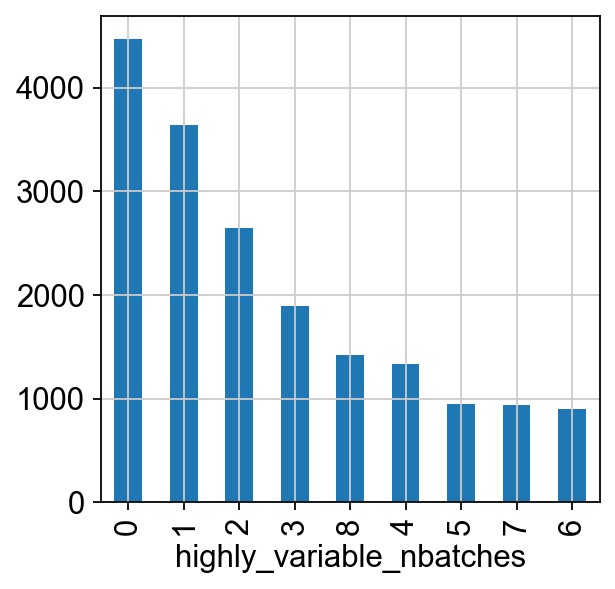

In [27]:
## 7.2.1 看批次高变基因
n_batches = adata_batch.var["highly_variable_nbatches"].value_counts()
ax = n_batches.plot(kind="bar")
n_batches

In [28]:
## 7.2.2 取高变基因子集
adata_batch = adata_batch[:, adata_batch.var["highly_variable"]].copy()
adata_batch

/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


AnnData object with n_obs × n_vars = 26051 × 6000
    obs: 'Barcode', 'batch', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'all_outlier', 'n_genes', 'doublet_score', 'predicted_doublet', 'size_factors'
    var: 'gene_ids', 'feature_types', 'genome', 'gene_names', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'scrublet', 'hvg'
    layers: 'counts', 'scran_normalization', 's

In [29]:
## 7.3 scvi去批次
"""
    - 变分自动编码器是一种试图降低数据集维数的人工神经网络。
    - 条件部分是指在特定协变量(在本例中为batch)上调节此降维过程，
    - 以便协变量不会影响低维表示。
    - scvi效果很好,但是需要原始counts数据
    - scvi-tools包建议使用1000到10000个基因,我根据7.2.1的图选择
    - 不用原始数据就非常不准
    ------------------------------------------------------
    虽然选择较少的基因可以帮助消除批次效应（变异最大的基因通常仅描述显性生物变异）
    建议选择稍微过多的基因，而不是选择太少的基因，
    否则可能会删除对稀有细胞类型或感兴趣的途径很重要的基因。
"""

'\n    - 变分自动编码器是一种试图降低数据集维数的人工神经网络。\n    - 条件部分是指在特定协变量(在本例中为batch)上调节此降维过程，\n    - 以便协变量不会影响低维表示。\n    - scvi效果很好,但是需要原始counts数据\n    - scvi-tools包建议使用1000到10000个基因,我根据7.2.1的图选择\n    - 不用原始数据就非常不准\n    ------------------------------------------------------\n    虽然选择较少的基因可以帮助消除批次效应（变异最大的基因通常仅描述显性生物变异）\n    建议选择稍微过多的基因，而不是选择太少的基因，\n    否则可能会删除对稀有细胞类型或感兴趣的途径很重要的基因。\n'

In [31]:
## 7.3.1 建模去批次
import scvi

scvi.model.SCVI.setup_anndata(adata_batch, layer="counts", batch_key="sample") 
# 建立模型
vae = scvi.model.SCVI(adata_batch, n_layers=2, n_latent=10, gene_likelihood="nb") 
# 训练
vae.train()

/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/fanxi/mambaforge/envs/lang/lib/python3.11/site ...
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/fanxi/mambaforge/envs/lang/lib/python3.11/site ...
  rank_zero_warn(


Epoch 307/307: 100%|██████████| 307/307 [18:10<00:00,  3.50s/it, v_num=1, train_loss_step=1.92e+3, train_loss_epoch=2.36e+3]

`Trainer.fit` stopped: `max_epochs=307` reached.


Epoch 307/307: 100%|██████████| 307/307 [18:10<00:00,  3.55s/it, v_num=1, train_loss_step=1.92e+3, train_loss_epoch=2.36e+3]



In [35]:
## 7.3.2 整合去批次结果
adata_batch.obsm["X_scVI"] = vae.get_latent_representation()

computing neighbors
    computing neighbors
    computed neighbors (0:00:18)
    computed connectivities (0:00:02)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:21)
running Leiden clustering
    finished: found 25 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:10)
computing UMAP


  3%|▎         | 6/200 [00:00<00:18, 10.50it/s]

	completed  0  /  200 epochs


 13%|█▎        | 26/200 [00:01<00:10, 15.95it/s]

	completed  20  /  200 epochs


 23%|██▎       | 46/200 [00:03<00:09, 15.96it/s]

	completed  40  /  200 epochs


 33%|███▎      | 66/200 [00:04<00:08, 16.06it/s]

	completed  60  /  200 epochs


 43%|████▎     | 86/200 [00:05<00:07, 16.11it/s]

	completed  80  /  200 epochs


 53%|█████▎    | 106/200 [00:06<00:05, 16.03it/s]

	completed  100  /  200 epochs


 63%|██████▎   | 126/200 [00:08<00:04, 16.14it/s]

	completed  120  /  200 epochs


 73%|███████▎  | 146/200 [00:09<00:03, 16.15it/s]

	completed  140  /  200 epochs


 83%|████████▎ | 166/200 [00:10<00:02, 16.10it/s]

	completed  160  /  200 epochs


 93%|█████████▎| 186/200 [00:11<00:00, 16.08it/s]

	completed  180  /  200 epochs


100%|██████████| 200/200 [00:12<00:00, 15.62it/s]

    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)



/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


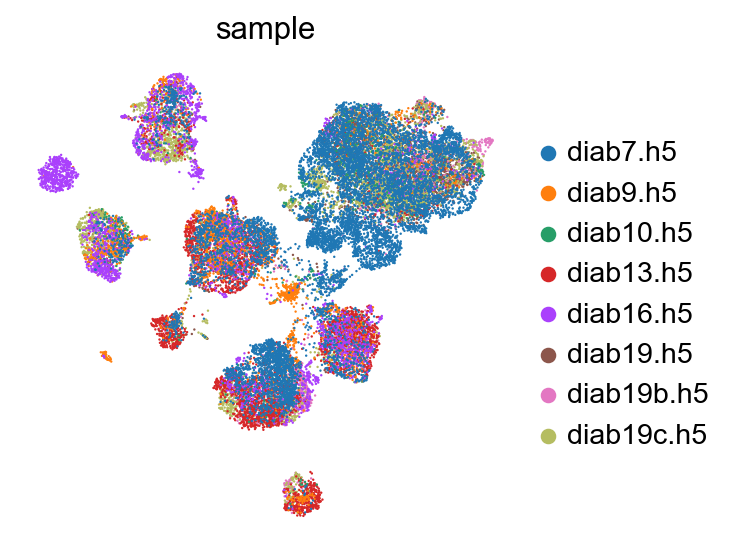

In [36]:
## 7.3.3 降维聚类可视化批次效应

sc.pp.neighbors(adata_batch, use_rep="X_scVI")
sc.tl.leiden(adata_batch)
sc.tl.umap(adata_batch)
sc.pl.umap(adata_batch, color="sample")

In [37]:
# ## 7.3.3.1 GPU加速版UMAP
# from scvi.model.utils import mde
# import pymde

# adata_batch.obsm["X_mde"] = mde(adata_batch.obsm["X_scVI"]) 
# sc.pl.embedding(adata_batch, basis="X_mde", color=["sample", "leiden"], frameon=False, ncols=1,)

In [38]:
# ## 7.4 Harmony去批次
# """Harmony
#     - 稳健性能
#     - 无需猜测哪些簇对应于特定细胞类型
# """
# ## 7.4.1 预先降维
# # 使用反卷积标准化的数据
# """注意文件中的.X的变化,现在是对数化后、反卷积标准化后的数据"""
# adata_batch.X = adata_batch.layers["scran_normalization"]
# # regressing out 可能会过度校正，见7.5
# ## sc.pp.regress_out(adata_batch, ["log1p_total_counts_ribo","log1p_total_counts_hb"]) # 可选，修改adata.X，核糖体细胞周期有关
# ## sc.pp.scale(adata_batch, max_value=10) # 可选，默认修改adata.X，可定义layer
# sc.pp.pca(adata_batch, n_comps=50, random_state=123)
# sc.pl.pca_variance_ratio(adata_batch,  n_pcs=50,log=True)
# # %%
# ## 7.4.2 Harmony
# import scanpy.external as sce

# sce.pp.harmony_integrate(adata_batch, key='sample')
# # %%
# ## 7.4.3 整合去批次结果
# adata_batch.obsm["X_pca"] = adata_batch.obsm["X_pca_harmony"]
# sc.pp.neighbors(adata_batch, n_neighbors=10, n_pcs=30,random_state=123)
# sc.tl.leiden(adata_batch,random_state=123)
# sc.tl.umap(adata_batch,random_state=123) # tsne可以指定use_rep，umap不可以，。
# sc.tl.tsne(adata_batch,use_rep= "X_pca_harmony",random_state=123)
# # %%
# ## 7.4.4 降维聚类可视化批次效应
# sc.pl.umap(adata_batch, color=["leiden","sample"],save= "-7.4.4.pdf")
# sc.pl.pca(adata_batch, color=["leiden","sample"],save= "-7.4.4.pdf")
# sc.pl.tsne(adata_batch, color=["leiden","sample"],save= "-7.4.4.pdf")
# #TODO:这里发现07-d样本不正常，备份脚本跑一下删掉07-d后的

In [39]:
## 7.5 通过回归处理其他阻塞因素（可选）
""" regress_out 放在去批次前,选择高变基因后好些,不过结果算不上很好
    -------------------------------
    - 去批次是清除系统性差异的一种方法,但是可能还有其他小的阻塞因素。
    - 例如,细胞质量、细胞周期、细胞类型等, 轨迹分析喜欢用。
    - 但是,可能会过度校正
    -------------------------------
    - 不推荐用它来消除批次效应
    - 注意：在使用 sc.pp.regress_out 之前,通常需要对数据进行一些预处理,
    - 如归一化、对数变换等。这样可以确保校正是在合适的数据上执行的。
"""
# sc.pp.regress_out(
#     adata_batch, ["pct_counts_ribo", "pct_counts_mt", "pct_counts_hb"], copy=False
# )

' regress_out 放在去批次前,选择高变基因后好些,不过结果算不上很好\n    -------------------------------\n    - 去批次是清除系统性差异的一种方法,但是可能还有其他小的阻塞因素。\n    - 例如,细胞质量、细胞周期、细胞类型等, 轨迹分析喜欢用。\n    - 但是,可能会过度校正\n    -------------------------------\n    - 不推荐用它来消除批次效应\n    - 注意：在使用 sc.pp.regress_out 之前,通常需要对数据进行一些预处理,\n    - 如归一化、对数变换等。这样可以确保校正是在合适的数据上执行的。\n'

In [40]:
## 7.6 保存
"""总结
    - 去批次进行了粗浅的降维，聚类
    - 都只是为了可视化批次效应，方便调整方案
"""
adata = adata_batch.copy()
adata.write("anndata_batch.h5ad", compression="gzip") # type: ignore